In [56]:
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

import plotly
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import init_notebook_mode, iplot

import imblearn


import seaborn as sns

init_notebook_mode(connected=True)
pd.set_option('display.max_columns', 100)

In [57]:
# import mne
# import pandas as pd
# import numpy as np

# # Load the .edf file into Python
# raw = mne.io.read_raw_edf('rsvp_10Hz_02a.edf')

# # Extract the EEG signals
# eeg_data = raw.get_data()

# # Convert the EEG signals into a pandas DataFrame
# df = pd.DataFrame(np.transpose(eeg_data))

# # Save the DataFrame as a .csv file
# df.to_csv('sample.csv', index=False)


Extracting EDF parameters from c:\Users\DELL\OneDrive\Desktop\VJTI\TY\Sem6\ML Project 3\Epileptic-Seizure-Prediction-using-EEG-Signals\rsvp_10Hz_02a.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [63]:
data = pd.read_csv("DATA.csv")

In [64]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [65]:
data.tail()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,-57,-64,-73,-79,-76,-70,-63,-57,-57,-50,-45,-34,-33,-32,-30,-24,-24,-18,-9,-2,0,2,-3,-5,-13,-23,-39,-53,-59,-63,-63,-60,-57,-52,-46,-33,-27,-33,-32,...,-9,-15,-19,-20,-18,-14,0,9,21,34,45,55,60,69,68,58,54,44,40,38,39,39,32,23,22,14,13,15,18,20,20,25,28,29,29,29,26,24,24,20,15,16,12,5,-1,-18,-37,-47,-48,2
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,136,78,8,-66,-132,-180,-210,-227,-225,-212,-192,-168,-144,-117,-88,-54,-21,6,29,46,60,76,92,110,128,152,171,150,91,21,-29,-52,-67,-96,-123,-143,-155,-167,-176,-185,...,52,57,61,60,54,53,55,62,65,68,69,58,38,16,25,75,165,260,343,406,456,471,461,412,319,175,-5,-171,-293,-357,-378,-370,-346,-316,-278,-241,-201,-162,-126,-94,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,14,-1,-10,14,44,77,61,42,32,29,22,26,35,81,66,50,57,91,121,111,73,38,23,35,21,11,-12,2,17,61,88,90,76,18,5,10,23,48,32,4,...,-43,-48,-44,-22,-17,18,50,45,-9,-78,-90,-62,-38,-40,-21,-23,-11,-4,-9,-22,-42,-49,-48,-40,-40,-46,-43,-67,-67,-50,-18,-14,-39,-74,-86,-75,-68,-57,-78,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8,5
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,29,22,6,1,-28,-37,-35,-35,-45,-64,-105,-140,-157,-157,-147,-153,-147,-126,-112,-83,-56,-41,-40,-38,-34,-47,-41,-40,-42,-49,-56,-77,-105,-110,-103,-89,-80,-81,-98,-113,...,-98,-103,-99,-81,-56,-61,-67,-111,-112,-120,-98,-77,-60,-73,-88,-97,-118,-108,-100,-97,-91,-109,-122,-134,-137,-107,-95,-67,-54,-40,-31,-19,7,22,46,68,87,97,105,114,121,135,148,143,116,86,68,59,55,3
11499,X16.V1.210,29,41,57,72,74,62,54,43,31,23,13,11,-3,-5,-9,-14,1,27,60,69,69,50,33,20,15,4,-5,-4,-8,-15,-13,-2,21,39,48,37,10,-23,-47,-71,-80,-74,-59,-44,-30,-17,-3,6,13,...,49,65,64,44,15,-14,-38,-68,-99,-107,-108,-83,-46,0,30,39,44,33,22,8,-13,-33,-61,-70,-75,-74,-58,-18,19,54,71,76,74,65,56,18,-28,-75,-98,-94,-59,-25,-4,2,5,4,-2,2,20,4


In [66]:
data.shape

(11500, 180)

This dataset is a pre processed form of Electroencephalogram (EEG) signals specifically collected for the sake of predicting Epileptic seizures. This dataset contains 11500 samples and 180 features, each feature representing the EEG signal data.

ROWS: 11500
COLUMNS: 180

The last column contains the category of the 178-dimensional input vector. y can take values: {1, 2, 3, 4, 5}

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open
4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed
3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area
2 - They recorder the EEG from the area where the tumor was located
1 - Recording of seizure activity All subjects falling in classes 2, 3, 4, and 5 are subjects who did not have epileptic seizure. Only subjects in class 1 have epileptic seizure.

In [67]:
data['y'].value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

<AxesSubplot: >

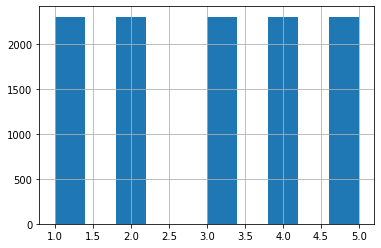

In [ ]:
data.y.hist()

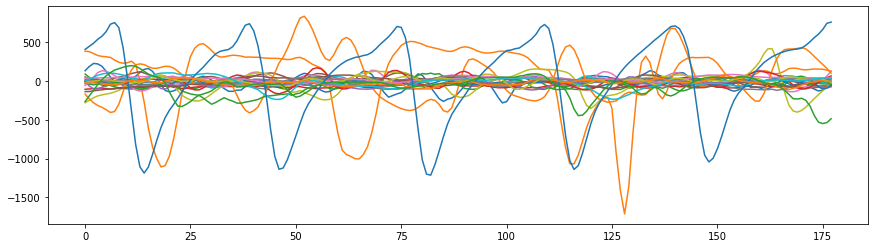

In [ ]:
plt.figure(figsize=(50,4))
plt.subplot(131)
[plt.plot(data.values[i][1:-1]) for i in range(23)];

As we can see, samples with y label {1} have seizures whereas all other {2,3,4,5} do not have seizures. So this multi-classification task can be converted to a binary classification task. The first part will cover binary classification. Later we'll train the models for multi-classification.

In [ ]:
dic = {5: 0, 4: 0, 3: 0, 2: 0, 1: 1}
data['y'] = data['y'].map(dic)
#Converting this to binary

In [ ]:
print(data['y'].value_counts())

data.head()

0    9200
1    2300
Name: y, dtype: int64


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,-14,25,19,6,9,21,13,-37,-58,-33,...,-23,8,42,77,103,135,121,79,59,43,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,312,309,309,303,297,295,295,293,286,279,...,-1360,-662,-96,243,323,241,29,-167,-228,-136,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,-15,-30,-47,-53,-65,-64,-68,-85,-98,-109,...,-60,-37,-26,-15,-6,-14,-23,-34,-41,-54,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,-69,-67,-66,-58,-54,-56,-70,-80,-82,-85,...,-61,-66,-72,-88,-90,-88,-77,-58,-53,-61,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,1,16,14,-14,-42,-56,-45,-45,-45,-38,...,55,54,38,19,4,-1,10,22,26,37,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [ ]:
data = data.drop('Unnamed', axis = 1)

In [ ]:
data = shuffle(data)

In [ ]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,-6.964087,-5.773826,-4.700783,-4.143826,-4.546087,-5.53200,-6.670435,-7.702348,-7.894696,-8.081391,...,-7.629391,-7.373565,-7.439913,-7.592348,-6.897652,-6.000348,-5.423913,-5.151043,-5.586870,-6.281478,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,161.197812,158.045513,157.490904,160.163082,163.996955,167.74431,171.232021,171.484787,169.299229,166.255922,...,158.301750,157.214361,158.679911,160.183325,162.002986,164.260512,166.182755,167.154785,167.414376,168.020316,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11500 entries, 3993 to 2686
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8 MB


In [ ]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(data[data['y'] == 0]), len(data[data['y'] == 1])))

Number of records of Non Epileptic 9200 VS Epilepttic 2300


In [ ]:
#Description of Non Epileptic
data[data['y'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,9200.0,-8.992609,70.455286,-566.0,-44.0,-7.0,26.0,1726.0
X2,9200.0,-8.877174,70.560110,-609.0,-44.0,-7.0,27.0,1713.0
X3,9200.0,-8.910435,70.372582,-594.0,-45.0,-7.0,28.0,1697.0
X4,9200.0,-8.969783,70.030409,-549.0,-45.0,-8.0,27.0,1612.0
X5,9200.0,-9.085326,69.377958,-603.0,-45.0,-8.0,27.0,1437.0
...,...,...,...,...,...,...,...,...
X175,9200.0,-9.848587,69.550894,-570.0,-45.0,-9.0,27.0,1958.0
X176,9200.0,-9.620435,70.353607,-594.0,-46.0,-8.0,27.0,2047.0
X177,9200.0,-9.395435,70.934300,-563.0,-45.0,-9.0,27.0,2047.0
X178,9200.0,-9.240435,71.185850,-559.0,-45.0,-8.0,27.0,1915.0


In [ ]:
#Description of Epileptic

data[data['y'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
X1,2300.0,-21.936522,342.361939,-1839.0,-193.25,-16.0,159.00,1314.0
X2,2300.0,-19.049130,343.398782,-1838.0,-191.25,-18.0,168.25,1356.0
X3,2300.0,-15.293913,337.489643,-1835.0,-187.00,-12.5,169.25,1274.0
X4,2300.0,-9.836087,332.354833,-1845.0,-184.00,-6.0,166.25,1226.0
X5,2300.0,-3.707391,332.211163,-1791.0,-174.25,-12.0,170.00,1518.0
...,...,...,...,...,...,...,...,...
X175,2300.0,-25.830870,339.650467,-1863.0,-195.00,-14.5,153.25,1205.0
X176,2300.0,-25.043913,335.747017,-1781.0,-192.00,-18.0,150.00,1371.0
X177,2300.0,-24.548261,335.244512,-1727.0,-190.25,-21.5,151.25,1445.0
X178,2300.0,-24.016522,339.819309,-1829.0,-189.00,-23.0,157.25,1380.0


In [ ]:
print('Mean VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().mean()).mean()))

print('Std VALUE for Epiletic: {}'.format((data[data['y'] == 1].describe().std()).std()))

print('Totall Mean VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().mean()).mean()))

print('Totall Std VALUE for NON Epiletic: {}'.format((data[data['y'] == 0].describe().std()).std()))

Mean VALUE for Epiletic: 290.129360958884
Std VALUE for Epiletic: 53.56315864740058
Totall Mean VALUE for NON Epiletic: 1260.098927262616
Totall Std VALUE for NON Epiletic: 15.561044289100993


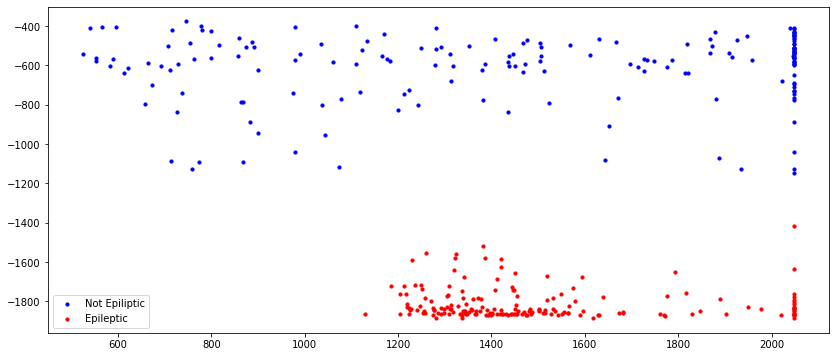

In [ ]:
#lists of arrays containing all data without y column
not_epileptic = [data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values]
epileptic = [data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values]

#We will create and calculate 2d indicators in order plot data in 2 dimensions;

def indic(data):
    """Indicators can be different. In our case we use just min and max values
    Additionally, it can be mean and std or another combination of indicators"""
    max = np.max(data, axis=1)
    min = np.min(data, axis=1)
    return max, min

x1,y1 = indic(not_epileptic)
x2,y2 = indic(epileptic)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=10, c='b', label='Not Epiliptic')
ax1.scatter(x2, y2, s=10, c='r', label='Epileptic')
plt.legend(loc='lower left');
plt.show()

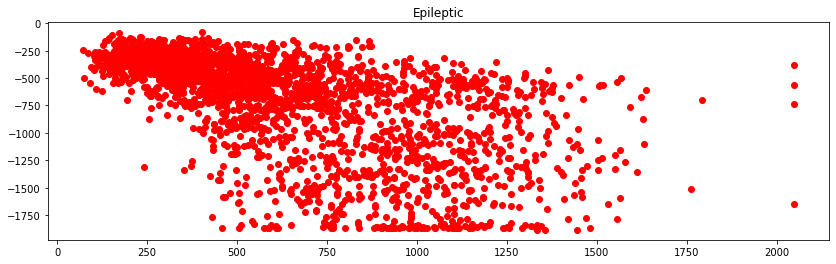

In [ ]:
#Epileptic
x,y = indic(data[data['y']==1].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('Epileptic')
plt.scatter(x, y, c='r');

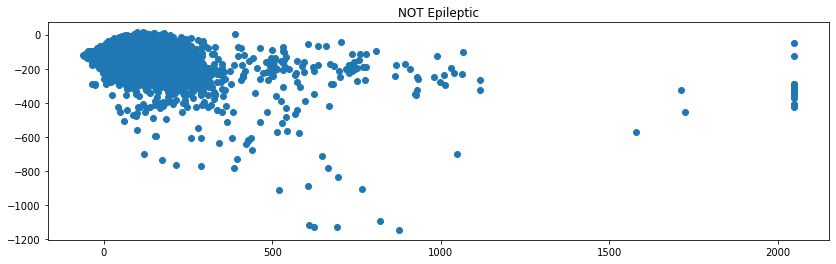

In [ ]:
#Not Epileptic
x,y = indic(data[data['y']==0].iloc[:, range(0, len(data.columns)-1)].values)
plt.figure(figsize=(14,4))
plt.title('NOT Epileptic')
plt.scatter(x, y);

In [ ]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(data[data['y'] == 0]), len(data[data['y'] == 1])))

Number of records of Non Epileptic 9200 VS Epilepttic 2300


### Eliminating Imbalance

As we can see, this dataset is quite imbalanced, so we'll need to perform balancing techniques. This can be done using the imblearn library in Python that can create synthetic samples in order to balance out the data and thus provide us with more accurate results.

In [ ]:
# define oversampling strategy
oversample = imblearn.over_sampling.RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X, y = oversample.fit_resample(data.drop('y', axis=1), data['y'])

X.shape, y.shape

((18400, 178), (18400,))

In [ ]:
print('Number of records of Non Epileptic {0} VS Epilepttic {1}'.format(len(y == True), len(y == False)))

Number of records of Non Epileptic 18400 VS Epilepttic 18400


Now the data is balanced as number of records for epileptic as well as non epileptic are equal (18400) Before it was 2300 by 9200

### Normalizing

In [ ]:
# X = data.drop('y', axis=1)
# y = data['y']

normalized_df = pd.DataFrame(normalize(X))
normalized_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177
0,-0.058610,-0.051903,-0.060048,-0.070588,-0.078892,-0.076816,-0.079851,-0.098376,-0.127601,-0.154910,-0.161138,-0.140856,-0.113228,-0.091828,-0.102368,-0.100931,-0.104924,-0.088954,-0.072025,-0.058131,-0.043758,-0.034975,-0.019324,0.000799,0.019643,0.035613,0.046313,0.052701,0.059888,0.067713,0.073782,0.077136,0.080809,0.083204,0.084801,0.085280,0.084482,0.082885,0.080649,0.078892,0.077136,0.074740,0.072185,0.068033,0.063401,0.058610,0.054139,0.051104,0.061325,0.102209,...,0.037849,0.047591,0.019164,-0.063561,-0.152036,-0.206494,-0.215117,-0.189885,-0.145328,-0.057492,0.012936,0.056375,0.045355,0.014373,-0.008304,-0.023316,-0.027469,-0.016769,-0.004472,0.006548,0.012137,0.018845,0.031461,0.046313,0.058610,0.067394,0.073303,0.077136,0.079531,0.080968,0.082725,0.084003,0.085121,0.085760,0.085280,0.084961,0.084801,0.084801,0.083843,0.082086,0.080809,0.079052,0.076816,0.074900,0.072185,0.065957,0.059888,0.069310,0.082246,0.062283
1,-0.032744,-0.033767,-0.031721,-0.039906,-0.053209,-0.055255,-0.061395,-0.065488,-0.071627,-0.074697,-0.078790,-0.084929,-0.089022,-0.085952,-0.085952,-0.079813,-0.066511,-0.061395,-0.059348,-0.052185,-0.052185,-0.057302,-0.065488,-0.071627,-0.075720,-0.066511,-0.056278,-0.041953,-0.027628,-0.022511,-0.012279,-0.006139,0.003070,0.007163,0.008186,0.004093,0.000000,0.006139,0.016372,0.028651,0.036837,0.043999,0.052185,0.062418,0.073673,0.084929,0.099255,0.115626,0.128929,0.135068,...,0.083906,0.068557,0.054232,0.032744,0.009209,-0.010232,-0.027628,-0.035813,-0.049116,-0.052185,-0.050139,-0.055255,-0.061395,-0.068557,-0.068557,-0.073673,-0.066511,-0.068557,-0.067534,-0.073673,-0.080836,-0.091069,-0.102324,-0.110510,-0.121766,-0.130975,-0.137114,-0.137114,-0.136091,-0.137114,-0.136091,-0.131998,-0.131998,-0.131998,-0.127905,-0.122789,-0.112557,-0.107440,-0.102324,-0.105394,-0.101301,-0.098231,-0.102324,-0.106417,-0.108464,-0.110510,-0.114603,-0.115626,-0.112557,-0.108464
2,0.110890,0.128843,0.124619,0.092936,0.038019,-0.001056,-0.020066,-0.017954,-0.004224,-0.017954,-0.025346,-0.061253,-0.072870,-0.066534,-0.059141,-0.033795,-0.030627,0.004224,0.012673,0.036963,0.041188,0.009505,-0.017954,-0.026402,-0.022178,-0.026402,-0.019010,0.008449,0.034851,0.076039,0.079207,0.088712,0.077095,0.077095,0.061253,0.033795,0.026402,0.030627,0.045412,0.046468,0.065478,0.077095,0.093992,0.079207,0.073926,0.064422,0.065478,0.077095,0.084487,0.101385,...,0.074983,0.071814,0.076039,0.115114,0.123563,0.117226,0.098217,0.062309,0.040131,0.026402,0.016897,0.005280,0.001056,-0.001056,-0.010561,-0.028514,-0.030627,-0.010561,0.013729,0.030627,0.033795,0.031683,0.004224,-0.001056,-0.017954,-0.010561,-0.006337,-0.007393,-0.011617,-0.016897,0.001056,0.036963,0.070758,0.084487,0.089768,0.083431,0.077095,0.081319,0.100329,0.099273,0.109834,0.125675,0.115114,0.101385,0.086600,0.076039,0.067590,0.065478,0.062309,0.058085
3,0.006382,0.002553,-0.012763,-0.025526,-0.039566,-0.062539,-0.088066,-0.108487,-0.122526,-0.134013,-0.130184,-0.127631,-0.119973,-0.112316,-0.098276,-0.062539,-0.025526,0.011487,0.034460,0.033184,0.003829,-0.028079,-0.031908,-0.049776,-0.040842,-0.037013,-0.016592,0.003829,0.034460,0.043395,0.031908,0.012763,0.001276,0.005105,0.006382,0.015316,0.022974,0.019145,0.016592,0.021697,0.040842,0.057434,0.091895,0.098276,0.095723,0.085513,0.082960,0.081684,0.076579,0.081684,...,-0.011487,-0.020421,-0.042118,-0.063816,-0.081684,-0.084237,-0.095723,-0.094447,-0.088066,-0.082960,-0.084237,-0.088066,-0.084237,-0.080408,-0.074026,-0.070197,-0.066368,-0.070197,-0.080408,-0.085513,-0.097000,-0.097000,-0.093171,-0.098276,-0.105934,-0.107210,-0.095723,-0.082960,-0.068921,-0.057434,-0.047224,-0.051053

In [ ]:
normalized_df['y'] = y

print('Normalized Totall Mean VALUE for Epiletic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().mean()).mean()))
print('Normalized Totall Std VALUE for Epiletic: {}'.format((normalized_df[normalized_df['y'] == 1].describe().std()).std()))

print('Normalized Totall Mean VALUE for NOT Epiletic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().mean()).mean()))
print('Normalized Totall Std VALUE for NOT Epiletic: {}'.format((normalized_df[normalized_df['y'] == 0].describe().std()).std()))

Normalized Totall Mean VALUE for Epiletic: 1150.0132578338362
Normalized Totall Std VALUE for Epiletic: 0.022560624066459128
Normalized Totall Mean VALUE for NOT Epiletic: 1150.0065271687797
Normalized Totall Std VALUE for NOT Epiletic: 0.002007429551034863


#### Splitting data

In [ ]:
X = normalized_df.drop('y', axis=1)
y = normalized_df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
#Check the shapes after splitting
he = X_train, X_test, y_train, y_test
[arr.shape for arr in he]

[(10304, 178), (5520, 178), (10304,), (5520,)]

### Testing on Models

1. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


dtree_model = DecisionTreeClassifier(max_depth = None,min_samples_split=2,criterion='entropy').fit(X_train, y_train.values.ravel())

dtree_predictions = dtree_model.predict(X_test)

#accuracy = DecisionTreeClassifier.score(X_test, y_test)
#print(accuracy)

# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)
cm
print(classification_report(y_test,dtree_predictions))

accuracy = accuracy_score(y_test, dtree_predictions)
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      2758
           1       0.82      0.94      0.88      2762

    accuracy                           0.87      5520
   macro avg       0.88      0.87      0.87      5520
weighted avg       0.88      0.87      0.87      5520

Accuracy: 0.8666666666666667


2. KNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train.values.ravel())

knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)
cm
print(classification_report(y_test,knn_predictions))
accuracy_knn = accuracy_score(y_test, knn_predictions)
print(accuracy_knn)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      2758
           1       0.89      0.94      0.91      2762

    accuracy                           0.91      5520
   macro avg       0.91      0.91      0.91      5520
weighted avg       0.91      0.91      0.91      5520

0.9115942028985508


3. Naive Bayes Classifier

In [ ]:
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=1e-09).fit(X_train, y_train.values.ravel())
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
print('Accuracy: ${cm}')
print(classification_report(y_test,gnb_predictions))

0.5990942028985508
Accuracy: ${cm}
              precision    recall  f1-score   support

           0       0.61      0.57      0.59      2758
           1       0.59      0.63      0.61      2762

    accuracy                           0.60      5520
   macro avg       0.60      0.60      0.60      5520
weighted avg       0.60      0.60      0.60      5520



4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
clf4 = RandomForestClassifier(random_state=42,n_estimators=10)

clf4.fit(X_train, y_train.values.ravel())
y_pred4 = clf4.predict(X_test)
Acc2 = metrics.accuracy_score(y_test,y_pred4)
print(Acc2)
cm = confusion_matrix(y_test, y_pred4)
print('Accuracy: ${cm}')
print(classification_report(y_test,y_pred4))

0.9422101449275362
Accuracy: ${cm}
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2758
           1       0.95      0.94      0.94      2762

    accuracy                           0.94      5520
   macro avg       0.94      0.94      0.94      5520
weighted avg       0.94      0.94      0.94      5520



In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC(kernel= 'rbf')
model.fit(X_train, y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test, predictions))

Accuracy: 0.8996376811594203
Precision: 0.8898305084745762
Recall: 0.9123823316437364


### Creating an Artificial Neural Network

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Dense, Activation

Defining the model

In [ ]:
model = Sequential()

In [ ]:
X_train.shape

(10304, 178)

In [ ]:
# Add a dense layer with 10 neurons and ReLU activation function as the input layer
model.add(Dense(256, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(128, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(128, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(64, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(32, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(32, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(32, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(16, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(16, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(8, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dense(5, input_dim=X_train.shape[1], activation='LeakyReLU'))

# Add a dense layer with 1 neuron and sigmoid activation function as the output layer
model.add(Dense(1, activation='softmax'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)

Epoch 1/50
322/322 [==============================] - 6s 7ms/step - loss: 0.6914 - accuracy: 0.5018
Epoch 2/50
322/322 [==============================] - 2s 7ms/step - loss: 0.6853 - accuracy: 0.5018
Epoch 3/50
322/322 [==============================] - 3s 10ms/step - loss: 0.6739 - accuracy: 0.5018
Epoch 4/50
322/322 [==============================] - 5s 14ms/step - loss: 0.6581 - accuracy: 0.5018
Epoch 5/50
322/322 [==============================] - 11s 34ms/step - loss: 0.6228 - accuracy: 0.5018
Epoch 6/50
322/322 [==============================] - 8s 25ms/step - loss: 0.5381 - accuracy: 0.5018
Epoch 7/50
322/322 [==============================] - 9s 29ms/step - loss: 0.4815 - accuracy: 0.5018
Epoch 8/50
322/322 [==============================] - 13s 40ms/step - loss: 0.4432 - accuracy: 0.5018
Epoch 9/50
322/322 [==============================] - 12s 38ms/step - loss: 0.4192 - accuracy: 0.5018
Epoch 10/50
322/322 [==============================] - 14s 43ms/step - loss: 0.4103 - accu

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               45824     
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 32)                1

### Parallel Implementation of Support Vector Machine

This parallel implementation will be done using the JobLIB library in python and sklearn for SVM. This will speed up the training of the model.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from joblib import Parallel, delayed

In [ ]:
def train_svm(X_train_subset, y_train_subset, X_test, y_test):
    clf = SVC(kernel='rbf')
    clf.fit(X_train_subset, y_train_subset)
    y_pred = clf.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
n_cores = 2  # number of CPU cores to use

accuracies = Parallel(n_jobs=n_cores)(
    delayed(train_svm)(X_train_subset, y_train_subset, X_test, y_test)
    for X_train_subset, y_train_subset in zip(np.array_split(X_train, n_cores), np.array_split(y_train, n_cores))
)

In [ ]:
mean_accuracy = np.mean(accuracies)
print(f"Mean accuracy: {mean_accuracy}")

Mean accuracy: 0.8711050724637681


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_features = X_train.shape[1]
# Define the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(num_features,)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)



Epoch 1/500
322/322 [==============================] - 4s 6ms/step - loss: 0.6109 - accuracy: 0.6644 - val_loss: 0.4757 - val_accuracy: 0.7803
Epoch 2/500
322/322 [==============================] - 2s 5ms/step - loss: 0.4916 - accuracy: 0.7719 - val_loss: 0.4041 - val_accuracy: 0.8160
Epoch 3/500
322/322 [==============================] - 2s 5ms/step - loss: 0.4516 - accuracy: 0.7943 - val_loss: 0.3812 - val_accuracy: 0.8307
Epoch 4/500
322/322 [==============================] - 2s 5ms/step - loss: 0.4275 - accuracy: 0.8121 - val_loss: 0.3649 - val_accuracy: 0.8447
Epoch 5/500
322/322 [==============================] - 2s 5ms/step - loss: 0.4166 - accuracy: 0.8208 - val_loss: 0.3563 - val_accuracy: 0.8486
Epoch 6/500
322/322 [==============================] - 2s 5ms/step - loss: 0.4068 - accuracy: 0.8324 - val_loss: 0.3461 - val_accuracy: 0.8544
Epoch 7/500
322/322 [==============================] - 1s 5ms/step - loss: 0.3967 - accuracy: 0.8264 - val_loss: 0.3430 - val_accuracy: 0.8571

## Recurrent Neural Network

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# Define hyperparameters
seq_length = 10
input_dim = 32
hidden_units = 64

# Generate some sample data
x_train = np.random.rand(100, seq_length, input_dim)
y_train = np.random.randint(0, 2, size=(100,))

# Define RNN model
model = Sequential()
model.add(SimpleRNN(units=hidden_units, input_shape=(seq_length, input_dim)))
model.add(Dense(units=1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10, batch_size=32)

# Generate some sample test data
x_test = np.random.rand(50, seq_length, input_dim)
y_test = np.random.randint(0, 2, size=(50,))

# Evaluate model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)


Epoch 1/10
4/4 [==============================] - 4s 11ms/step - loss: 0.7670 - accuracy: 0.5800
Epoch 2/10
4/4 [==============================] - 0s 12ms/step - loss: 0.7081 - accuracy: 0.4900
Epoch 3/10
4/4 [==============================] - 0s 9ms/step - loss: 0.6803 - accuracy: 0.5200
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 0.6505 - accuracy: 0.6100
Epoch 5/10
4/4 [==============================] - 0s 10ms/step - loss: 0.6379 - accuracy: 0.6200
Epoch 6/10
4/4 [==============================] - 0s 11ms/step - loss: 0.6185 - accuracy: 0.6600
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 0.6043 - accuracy: 0.6900
Epoch 8/10
4/4 [==============================] - 0s 12ms/step - loss: 0.5900 - accuracy: 0.7100
Epoch 9/10
4/4 [==============================] - 0s 9ms/step - loss: 0.5770 - accuracy: 0.7500
Epoch 10/10
2/2 [==============================] - 1s 11ms/step - loss: 0.7548 - accuracy: 0.5000
0.5


In [ ]:
X_train.shape, X_test.shape

((10304, 178), (5520, 178))

In [ ]:
y_train.shape

(100,)

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM


x_train_numpy = X_train.to_numpy()
y_train_numpy = y_train.to_numpy()


x_test_numpy = X_test.to_numpy()
y_test_numpy = y_test.to_numpy()

# Reshape input data
x_train_numpy = x_train_numpy.reshape((x_train_numpy.shape[0], x_train_numpy.shape[1], 1))
x_test_numpy = x_test_numpy.reshape((x_test_numpy.shape[0], x_test_numpy.shape[1], 1))

# Define LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(178, 1)))
model.add(Dense(units=1, activation='relu'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(x_train_numpy, y_train_numpy, epochs=10, batch_size=32)

# Evaluate model on test data
loss, accuracy = model.evaluate(x_test_numpy, y_test_numpy)

# Make predictions on test data
loss, accuracy = model.predict(x_test_numpy)
print(accuracy)


AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [ ]:
print(predictions)

[[0.5093273 ]
 [0.51002455]
 [0.53186846]
 ...
 [0.48935044]
 [0.52128446]
 [0.5122872 ]]
